In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.isnull().sum(axis = 0).to_frame(name="nans").query("nans > 0")["nans"]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
Name: nans, dtype: int64

In [4]:
#LotFrontage    -  (num)    259/1460 ~ 18%
#Alley          NA
#MasVnrType     NONE = NA
#MasVnrArea     -  (num)    8/1460 ~ 0.5%
#BsmtQual       NA
#BsmtCond       NA
#BsmtExposure   NA
#BsmtFinType1   NA
#BsmtFinType2   NA
#Electrical     -            1/1460 ~ 0.07%
#FireplaceQu    NA
#GarageType     NA
#GarageYrBlt    -   (num)    81/1460 ~ 6%
#GarageFinish   NA
#GarageQual     NA
#GarageCond     NA
#PoolQC         NA
#Fence          NA
#MiscFeature    NA

In [5]:
df['Alley'] = df['Alley'].fillna('NA')
df['MasVnrType'] = df['MasVnrType'].fillna('NA')
df['BsmtQual'] = df['BsmtQual'].fillna('NA')
df['BsmtCond'] = df['BsmtCond'].fillna('NA')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['PoolQC'] = df['PoolQC'].fillna('NA')
df['Fence'] = df['Fence'].fillna('NA')
df['MiscFeature'] = df['MiscFeature'].fillna('NA')

In [6]:
#так как значения данного критерия находятся в небольшом диапазоне, можно взять среднее арифметическое
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [7]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [8]:
#как минимум половина значений = 0, а процент пропусков не такой большой, примем их за 0
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [9]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [10]:
#т.к. пропуск всего один, возьмём самое популярное значение
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [11]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [12]:
#процент пропусков небольшой, поэтому возьмём сред. значение
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(1978)

In [13]:
#проверяем, что больше нет пустых
df.isnull().sum(axis = 0).to_frame(name="nans").query("nans > 0")["nans"]

Series([], Name: nans, dtype: int64)

In [14]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [15]:
#выводим столбцы с числовыми данными
colums = df.select_dtypes(include='number')
column_list = colums.columns
print(column_list)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


<AxesSubplot:>

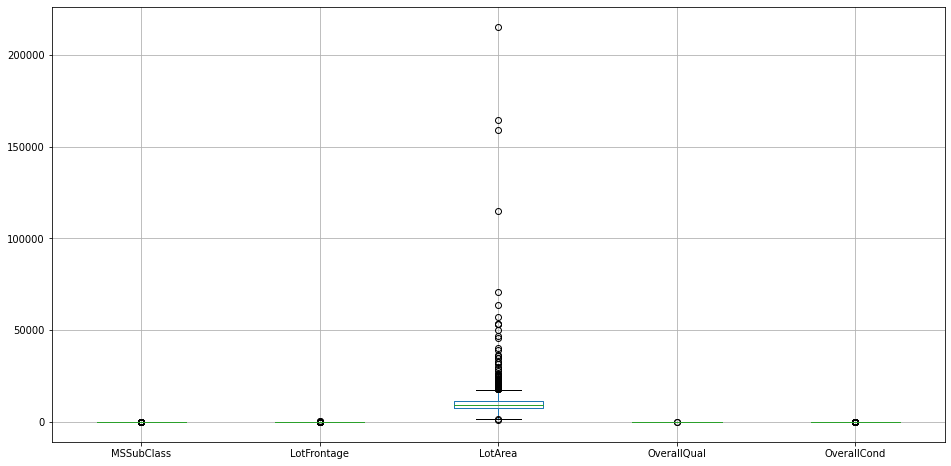

In [16]:
df.boxplot(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'], figsize = (16, 8))

<AxesSubplot:>

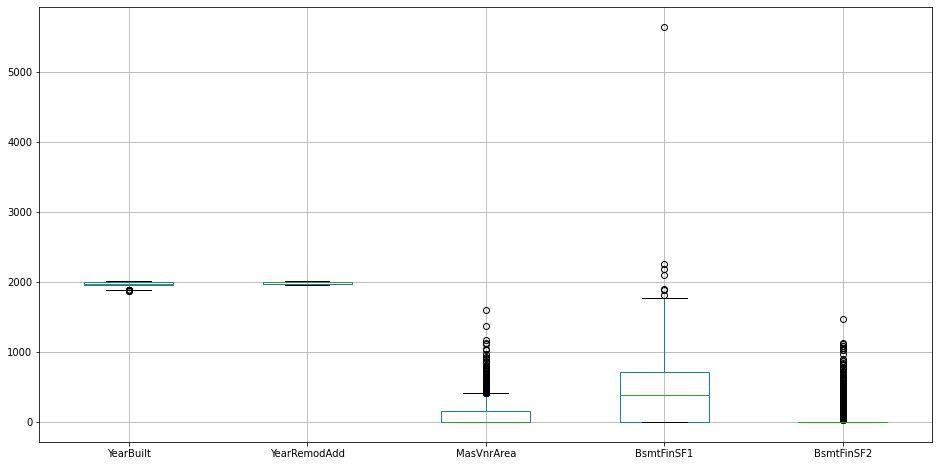

In [17]:
df.boxplot(['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'], figsize = (16, 8))

<AxesSubplot:>

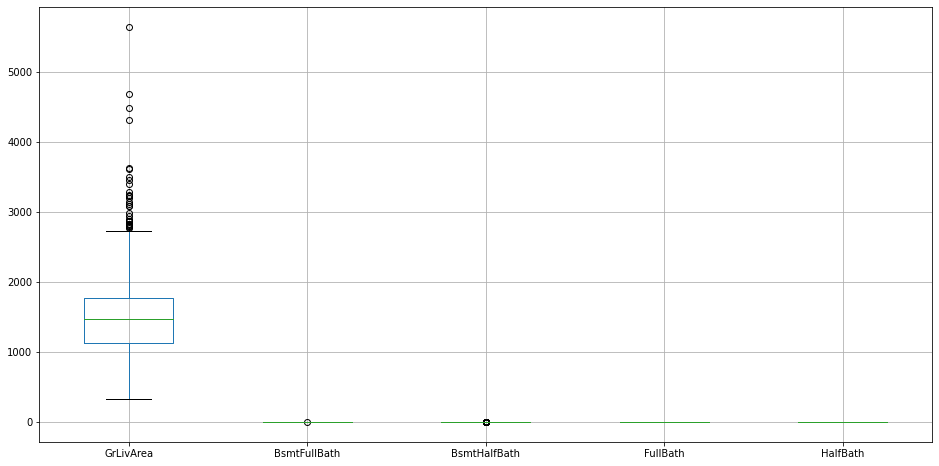

In [18]:
df.boxplot([ 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], figsize = (16, 8))

<AxesSubplot:>

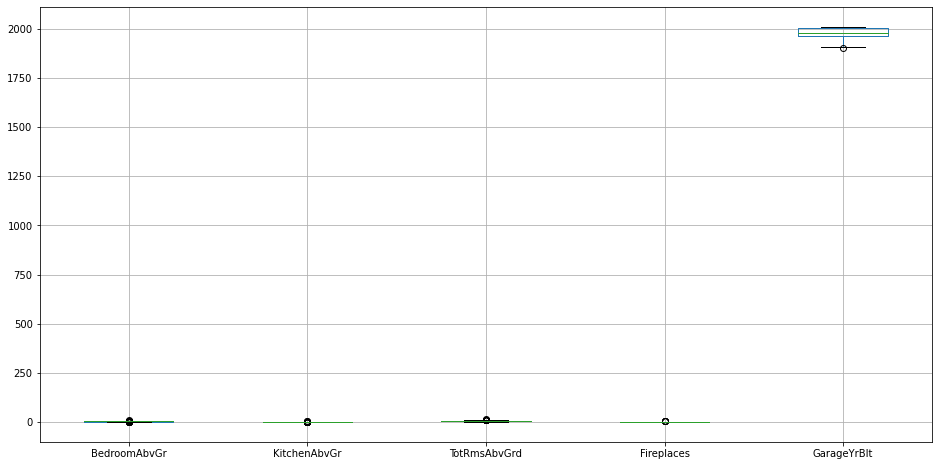

In [19]:
df.boxplot(['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt'], figsize = (16, 8))

<AxesSubplot:>

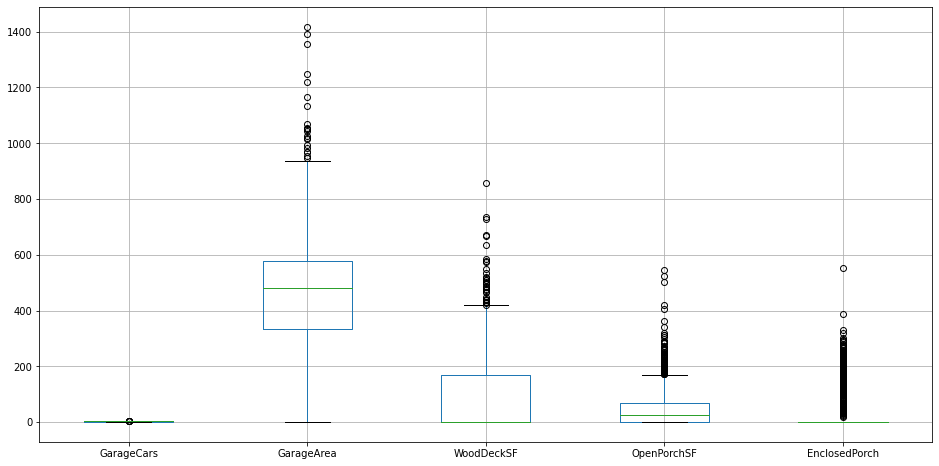

In [20]:
df.boxplot(['GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'], figsize = (16, 8))

<AxesSubplot:>

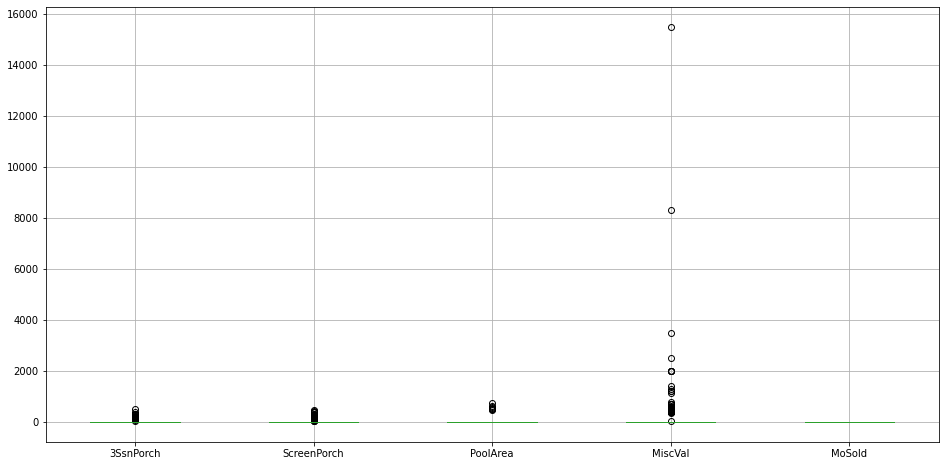

In [21]:
df.boxplot(['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold'], figsize = (16, 8))

<AxesSubplot:>

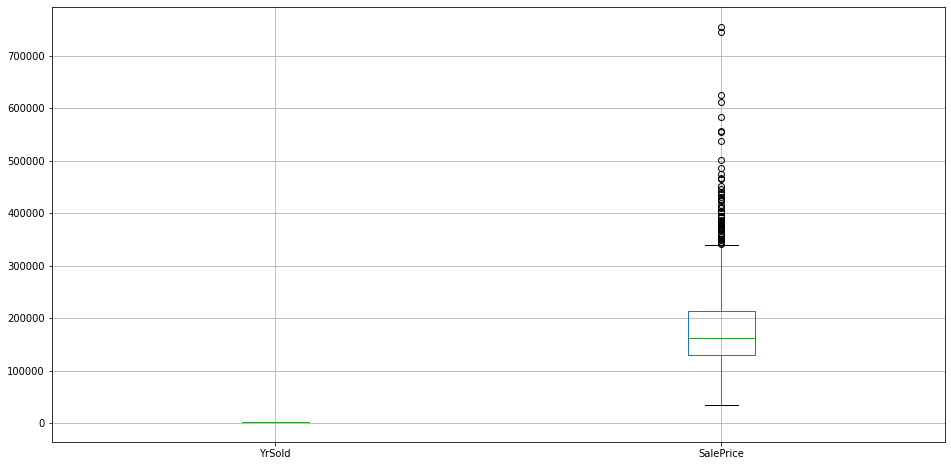

In [22]:
df.boxplot(['YrSold', 'SalePrice'], figsize = (16, 8))

In [23]:
columns_check = ['LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']

for column in columns_check:
       for x in [column]:
              q75,q25 = np.percentile(df.loc[:,x],[75,25])
              dif = q75-q25

              max = q75 + (1.5 * dif)
              min = q25 - (1.5 * dif)

              df.loc[df[x] < min, x] = np.nan
              df.loc[df[x] > max, x] = np.nan
    
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea          69
                 ..
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
SalePrice        61
Length: 81, dtype: int64

In [24]:
df = df.dropna(axis = 0)
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [25]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500.0,Pave,Pave,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,10,2009,WD,Normal,185000.0
1455,1456,60,RL,62.0,7917.0,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175.0,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042.0,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
